In [1]:
# Importing required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense # for creating regular densely-connected NN layers.

# Sklearn
import sklearn # for model evaluation
from sklearn.model_selection import train_test_split # for splitting data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn import model_selection
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn import metrics



# Warnings
import warnings
warnings.filterwarnings('always', category=FutureWarning)

In [2]:
# Reading the dataset
finance=pd.read_csv("./targetfirm_prediction_dataset_small.csv")
finance.drop(['ca','Unnamed: 0'],axis=1,inplace=True)

In [3]:
# Dropping the rows with more than 50% NaN values and imputing mean for the rest of the rows with less than 50% NaN values
perc=50.0
min_count = int(((100-perc)/100)*finance.shape[1]+1)
finance=finance.dropna(axis=0,thresh=min_count)
for i in finance.columns[finance.isnull().any(axis=0)]:     #---Applying Only on variables with NaN values
    finance[i].fillna(finance[i].mean(),inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [4]:
# Exploring the dataset to understand the percentage of 0 and 1 in the target variable
count_0 = len(finance[finance['target']==0.0])
count_1 = len(finance[finance['target']==1.0])
pct_of_0 = count_0/(count_0+count_1)
print("percentage of 0 is", pct_of_0*100)
pct_of_1 = count_1/(count_0+count_1)
print("percentage of 1 is", pct_of_1*100)

percentage of 0 is 99.0522472352833
percentage of 1 is 0.9477527647166986


In [5]:
# Selecting only the required rows
finance=finance.iloc[:,2:]
finance

,target,at,revt,ib,capx,ceq,che,emp,invt,re,xrd,dltt,dv,sic
0,0.0,701.854,874.255000,18.531000,13.134000,340.212,13.809,2.500000,320.590,204.065000,106.459562,179.987,9.157000,5080.0
1,0.0,710.199,638.721000,-58.939000,12.112000,310.235,34.522,2.200000,286.588,139.603000,106.459562,217.699,4.430000,5080.0
2,0.0,686.621,606.337000,-12.410000,9.930000,294.988,29.154,2.100000,259.954,124.106000,106.459562,164.658,0.797000,5080.0
3,0.0,709.292,651.958000,3.504000,10.286000,301.684,41.010,2.300000,247.245,131.884000,106.459562,248.666,0.000000,5080.0
4,0.0,732.230,747.848000,18.572000,13.033000,314.744,50.338,2.600000,255.477,142.450000,106.459562,227.159,0.000000,5080.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224996,0.0,507.122,409.522000,-60.812000,1.212000,319.736,46.522,0.808000,9.078,-153.433000,106.459562,20.790,1.674000,4412.0
224997,0.0,266.811,2674.036063,168.386784,200.648586,140.718,14.501,8.285289,0.536,-1.785000,106.459562,76.534,81.662572,4412.0
225001,0.0,1526.300,1704.000000,123.000000,84.800000,1341.800,14.000,8.285289,263.700,852.295869,106.459562,0.000,0.000000,3440.0
225002,0.0,1602.500,1462.400000,89.700000,82.400000,1407.900,6.800,5.490000,246.800,852.295869,106.459562,0.400,0.000000,3440.0


In [6]:
# Selecting the dependent and independent variables from the dataset
X=finance.iloc[:, 1:].values
y=finance['target'].values


In [7]:
# Splitting the dataset into training and testing dataframes. We assigned 30% of dataset for testing and 70% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
# Specifying the structure of a neural network
model2 = Sequential(name="Model") # Model
model2.add(Input(shape=(13,), name='Input-Layer')) # Input Layer - need to speicfy the shape of inputs
model2.add(Dense(2, activation='softplus', name='Hidden-Layer')) # Hidden Layer, softplus(x) = log(exp(x) + 1)
model2.add(Dense(1, activation='sigmoid', name='Output-Layer')) # Output Layer, sigmoid(x) = 1 / (1 + exp(-x))

In [9]:
# Compiling the keras model
model2.compile(optimizer='adam', # default='rmsprop', an algorithm to be used in backpropagation
              loss='binary_crossentropy', # Loss function to be optimized. A string (name of loss function), or a tf.keras.losses.Loss instance.
              metrics=['Accuracy', 'Precision', 'Recall'], # List of metrics to be evaluated by the model during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance. 
              loss_weights=None, # default=None, Optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model outputs.
              weighted_metrics=None, # default=None, List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.
              run_eagerly=None, # Defaults to False. If True, this Model's logic will not be wrapped in a tf.function. Recommended to leave this as None unless your Model cannot be run inside a tf.function.
              steps_per_execution=None # Defaults to 1. The number of batches to run during each tf.function call. Running multiple batches inside a single tf.function call can greatly improve performance on TPUs or small models with a large Python overhead.
             )

In [10]:
# Fitting keras model on the dataset
model2.fit(X_train, # input data
          y_train, # target data
          batch_size=10, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
          epochs=5, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
          verbose='auto', # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.
          callbacks=None, # default=None, list of callbacks to apply during training. See tf.keras.callbacks
          validation_split=0.2, # default=0.0, Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. 
          #validation_data=(X_test, y_test), # default=None, Data on which to evaluate the loss and any model metrics at the end of each epoch. 
          shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
          class_weight={0 : 0.3, 1 : 0.7}, # default=None, Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class.
          sample_weight=None, # default=None, Optional Numpy array of weights for the training samples, used for weighting the loss function (during training only).
          initial_epoch=0, # Integer, default=0, Epoch at which to start training (useful for resuming a previous training run).
          steps_per_epoch=None, # Integer or None, default=None, Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. When training with input tensors such as TensorFlow data tensors, the default None is equal to the number of samples in your dataset divided by the batch size, or 1 if that cannot be determined. 
          validation_steps=None, # Only relevant if validation_data is provided and is a tf.data dataset. Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.
          validation_batch_size=None, # Integer or None, default=None, Number of samples per validation batch. If unspecified, will default to batch_size.
          validation_freq=3, # default=1, Only relevant if validation data is provided. If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs.
          max_queue_size=10, # default=10, Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
          workers=1, # default=1, Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1.
          use_multiprocessing=False, # default=False, Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False. 
         )

Epoch 1/5
10660/10660 [==============================] - 37s 3ms/step - loss: 4.7982 - Accuracy: 0.9716 - precision: 0.0126 - recall: 0.0255
Epoch 2/5
10660/10660 [==============================] - 20s 2ms/step - loss: 0.0327 - Accuracy: 0.9904 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/5
10660/10660 [==============================] - 25s 2ms/step - loss: 0.0322 - Accuracy: 0.9904 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.0594 - val_Accuracy: 0.9901 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/5
10660/10660 [==============================] - 20s 2ms/step - loss: 0.2996 - Accuracy: 0.9904 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 5/5
10660/10660 [==============================] - 22s 2ms/step - loss: 0.0322 - Accuracy: 0.9904 - precision: 0.0000e+00 - recall: 0.0000e+00


In [11]:
# Using model to make predictions
# Predicting class labels on training data
pred_labels_tr = (model2.predict(X_train) > 0.5).astype(int)
# Predicting class labels on a test data
pred_labels_te = (model2.predict(X_test) > 0.5).astype(int)

In [12]:
# Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model2.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in model2.layers:
    print("Layer: ", layer.name) # print layer name
    print("  --Kernels (Weights): ", layer.get_weights()[0]) # kernels (weights)
    print("  --Biases: ", layer.get_weights()[1]) # biases
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_train, pred_labels_tr))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te))
print("")



-------------------- Model Summary --------------------
Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer (Dense)        (None, 2)                 28        
                                                                 
 Output-Layer (Dense)        (None, 1)                 3         
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________

-------------------- Weights and Biases --------------------
Layer:  Hidden-Layer
  --Kernels (Weights):  [[-0.620004   -0.03246747]
 [ 0.03391147 -0.05449716]
 [ 0.30635038  0.27944577]
 [-0.44798923  0.29380578]
 [-0.01191838 -0.21102373]
 [ 0.0226743   0.20789008]
 [-0.8730019   0.01914652]
 [ 0.0477188  -0.11080622]
 [-0.0177594   0.04813956]
 [-0.17034444 -0.5863798 ]
 [-0.8759985  -0.3358486 ]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    131957
         1.0       0.00      0.00      0.00      1284

    accuracy                           0.99    133241
   macro avg       0.50      0.50      0.50    133241
weighted avg       0.98      0.99      0.99    133241


---------- Evaluation on Test Data ----------
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     56584
         1.0       0.00      0.00      0.00       520

    accuracy                           0.99     57104
   macro avg       0.50      0.50      0.50     57104
weighted avg       0.98      0.99      0.99     57104




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
y_pred_keras = model2.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)

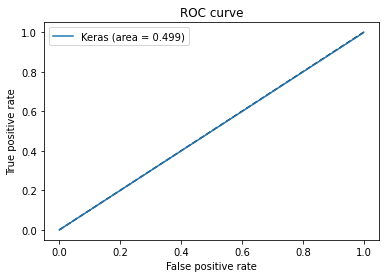

In [14]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()